#201600282 엄기산

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#셀 안에 있는 행들 모두 실행 결과 보기 위함

In [2]:
import numpy as np
# 행렬계산을 위한 numpy 라이브러리 사용

import matplotlib.pyplot as plt
%matplotlib inline
# 결과 출력 pyplot 사용

import matplotlib.cm as cm
# 출력사진 흑백 사진으로 변환하기 위한 컬러맵 사용

pip install opencv-python


# 가버 필터 라이브러리 사용을 위한 패키지 설치

In [3]:
import cv2
#가버필터 라이브러리 사용 및 이미지 흑백으로 가져오기 위함

컨볼루션 함수 구현

In [4]:
def conv(a,b):
    (a_row, a_column) = np.shape(a)
    (b_row, b_column) = np.shape(b)
    
    if (a_row != b_row) or (a_column != b_column):
        print("정확한 metrix를 입력하세요")
        return None
    
    else:
        sum = 0
        result = [x for row in a*b for x in row]
        for x in result:
            sum += x
        return sum
    
def convolution(metrix, filter):
    
    
    
    if np.ndim(metrix) == 2:
        result = np.zeros((metrix.shape[0]-2,metrix.shape[1]-2))
        for i in range(1,metrix.shape[0]-1):
            for j in range(1,metrix.shape[1]-1):
                result[i-1][j-1] = conv(metrix[i-1:i+2,j-1:j+2],filter)
                
    elif np.ndim(metrix) == 3:
        result = np.zeros((metrix.shape[0]-2,metrix.shape[1]-2,metrix.shape[2]))
        for k in range(np.ndim(metrix)):
            for i in range(1,metrix.shape[0]-1):
                for j in range(1,metrix.shape[1]-1):
                   
                    result[i-1,j-1,k] = conv(metrix[i-1:i+2,j-1:j+2,k],filter)
                    
                
    else:
        print("정확한 metrix를 입력하세요")
    return result


시계방향 90도 회전 함수 구현

In [5]:
def rot_90(a):
    if np.ndim(a)==2:
        result = np.zeros((np.transpose(a).shape))

        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                result[j][a.shape[0]-i-1] = a[i][j]
        return result
    elif np.ndim(a)==3:
        result = np.zeros((a.swapaxes(1,0).shape))
        for k in range(a.shape[2]):
            for i in range(a.shape[0]):
                for j in range(a.shape[1]):
                    result[j][a.shape[0]-i-1][k] = a[i][j][k]
        return result
    else:
        "정확한 행렬을 입력하세요"
        return None

이미지 불러오기

In [6]:
image_baboon = cv2.imread('./images/baboon.jpg', cv2.IMREAD_GRAYSCALE)

image_0 = plt.imread('./images/imag0.jpg', cv2.IMREAD_GRAYSCALE)

image_1 = plt.imread('./images/imag1.jpg', cv2.IMREAD_GRAYSCALE)

image_2 = plt.imread('./images/imag2.jpg', cv2.IMREAD_GRAYSCALE)

image_3 = plt.imread('./images/imag3.jpg', cv2.IMREAD_GRAYSCALE)

각 이미지의 행렬 크기 계산

In [7]:
image_baboon.shape
image_0.shape
image_1.shape
image_2.shape
image_3.shape

(266, 267)

(28, 28)

(28, 28)

(28, 28)

(28, 28)

각 이미지의 최대 최소값 확인

In [8]:
np.min(image_baboon), np.max(image_baboon)
np.min(image_0), np.max(image_0)
np.min(image_1), np.max(image_1)
np.min(image_2), np.max(image_2)
np.min(image_3), np.max(image_3)

(3, 255)

(0, 255)

(0, 255)

(0, 255)

(0, 255)

이미지 확인

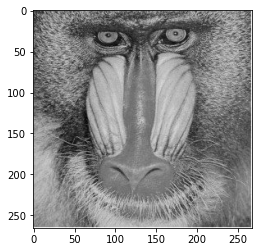

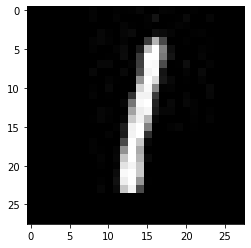

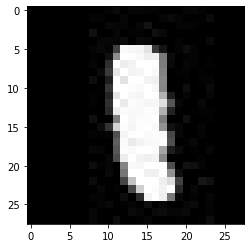

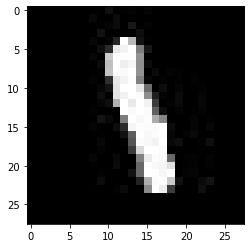

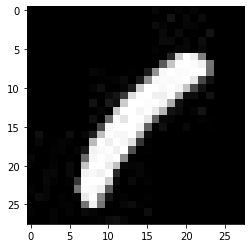

In [9]:
plt.imshow(image_baboon,cmap = cm.gray)
plt.show()
plt.imshow(image_0,cmap = cm.gray)
plt.show()
plt.imshow(image_1,cmap = cm.gray)
plt.show()
plt.imshow(image_2,cmap = cm.gray)
plt.show()
plt.imshow(image_3,cmap = cm.gray)
plt.show()

컨볼루션 함수 수행 for image_0

array([[-0.06112376,  0.67803513, -0.77466963],
       [-0.61633487,  1.        , -0.61633487],
       [-0.77466963,  0.67803513, -0.06112376]])

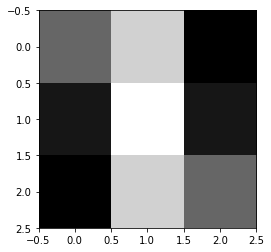

In [10]:
sigma0 = 2
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta0 = 10*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda0 = 1*np.pi/2
#각도 형식으로 입력 ( 파장의 유형 )

gamma0 = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi0 = 0
# 위상 오프셋을 설정


kernel_0 = cv2.getGaborKernel((3,3),sigma0,theta0,lamda0,gamma0,phi0)

plt.imshow(kernel_0,cmap = cm.gray)
kernel_0

<function matplotlib.pyplot.show(close=None, block=None)>

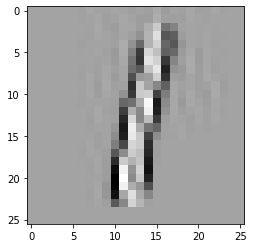

In [11]:
new_0= convolution(image_0,kernel_0)


plt.imshow(new_0,cmap = cm.gray)
plt.show

컨볼루션 함수 수행 for image_1

<function matplotlib.pyplot.show(close=None, block=None)>

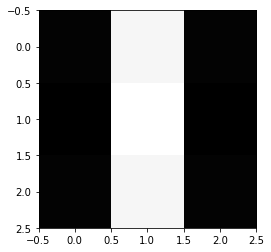

In [12]:
sigma1 = 3
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta1 = 0*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda1 = 1*np.pi/1
#각도 형식으로 입력 ( 파장의 유형 )

gamma1 = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi1 = 0
# 위상 오프셋을 설정
kernel_1 = cv2.getGaborKernel((3,3),sigma1,theta1,lamda1,gamma1,phi1)
plt.imshow(kernel_1,cmap = cm.gray)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

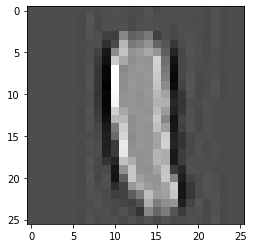

In [13]:
new_1 = convolution(image_1,kernel_1)


plt.imshow(new_1,cmap = cm.gray)
plt.show

이후 filter 값 수정 없이 사진만 90도 회전 후 convolution 수행.

<function matplotlib.pyplot.show(close=None, block=None)>

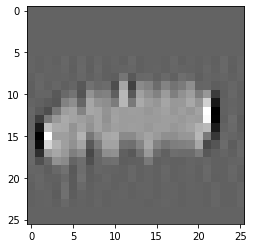

In [14]:
rot_new_1=convolution(rot_90(image_1),kernel_1)
plt.imshow(rot_new_1,cmap = cm.gray)
plt.show

kernel_1을 이미지 화 한것과 위 두개의 convolution 결과 이미지를 확인해보면

kernel값의 theta값 즉 커널의 로테이션의 방향에 따라 convolution 결과에서 경계선이 선명하게 나오는 방향이 정해진다.

그러므로 회전후 img_0의 경계선은 주로 가로방향으로 분포되어있으므로 theta값은 90도가 되어야 좀더 많은 경계선을 뚜렷하게 나타낼 수 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

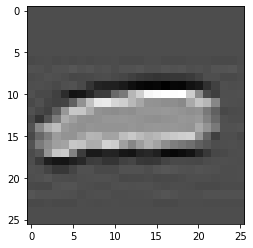

In [15]:
sigma1 = 3
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta1 = 90*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda1 = 1*np.pi/1
#각도 형식으로 입력 ( 파장의 유형 )

gamma1 = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi1 = 0
# 위상 오프셋을 설정
kernel_1 = cv2.getGaborKernel((3,3),sigma1,theta1,lamda1,gamma1,phi1)

rot_new_1 = convolution(rot_90(image_1),kernel_1)

plt.imshow(rot_new_1,cmap = cm.gray)
plt.show

컨볼루션 함수 수행 for image_2

<function matplotlib.pyplot.show(close=None, block=None)>

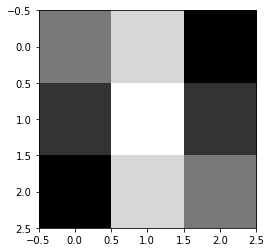

In [16]:
sigma2 = 5
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta2 = -15*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda2 = 1*np.pi/1
#각도 형식으로 입력 ( 파장의 유형 )

gamma2 = 3
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi2 = 0
# 위상 오프셋을 설정
kernel_2 = cv2.getGaborKernel((3,3),sigma2,theta2,lamda2,gamma2,phi2)
plt.imshow(kernel_2,cmap = cm.gray)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

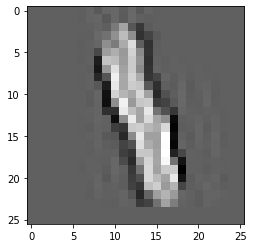

In [17]:
new_2 = convolution(image_2,kernel_2)


plt.imshow(new_2,cmap = cm.gray)
plt.show

회전만 수행

<function matplotlib.pyplot.show(close=None, block=None)>

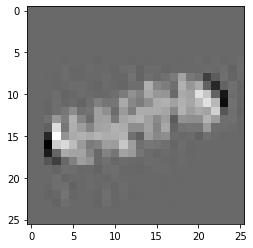

In [18]:
rot_new_2=convolution(rot_90(image_2),kernel_2)
plt.imshow(rot_new_2,cmap = cm.gray)
plt.show

이번 사진 또한 경계선이 주로 75도 방향으로 분포되어있으므로 theta값 80도로 수정

<function matplotlib.pyplot.show(close=None, block=None)>

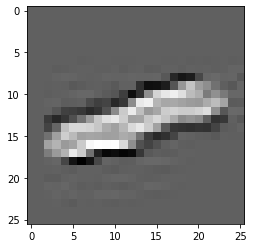

In [19]:
theta2 = 75*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

kernel_2 = cv2.getGaborKernel((3,3),sigma2,theta2,lamda2,gamma2,phi2)

rot_new_2=convolution(rot_90(image_2),kernel_2)
plt.imshow(rot_new_2,cmap = cm.gray)
plt.show

컨볼루션 함수 수행 for image_3

<function matplotlib.pyplot.show(close=None, block=None)>

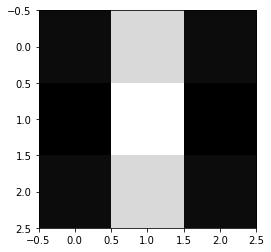

In [20]:
sigma3 = 1.5
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta3 = 0*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda3 = 1*np.pi/1
#각도 형식으로 입력 ( 파장의 유형 )

gamma3 = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi3 = 0
# 위상 오프셋을 설정
kernel_3 = cv2.getGaborKernel((3,3),sigma3,theta3,lamda3,gamma3,phi3)
plt.imshow(kernel_3,cmap = cm.gray)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

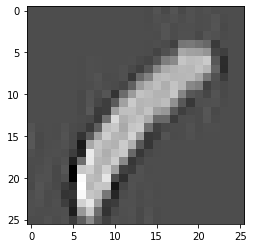

In [21]:
new_3 = convolution(image_3, kernel_3)


plt.imshow(new_3,cmap = cm.gray)
plt.show

회전만 수행

<function matplotlib.pyplot.show(close=None, block=None)>

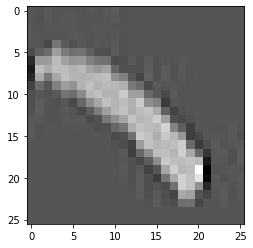

In [22]:
rot_new_3=convolution(rot_90(image_3),kernel_3)
plt.imshow(rot_new_3,cmap = cm.gray)
plt.show

img_3과 같은 경우에는 theta를 45도로 설정하면 확실히 45도 방향의 대각선 부분은 뚜렷하게 나타나지만 그렇지 못한 부분은

표현을 하지못하여 theta를 0도로 설정하였다. 

아래 두개의 사진을 통해 로테이션의 방향과 구분선이 나타나는 방향의 관계를 확인할 수 있다.

첫번째 = rotation : 45도
두번째 = rotation : -45도

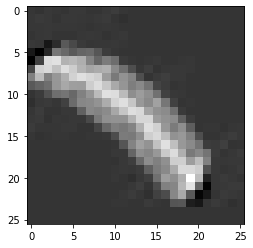

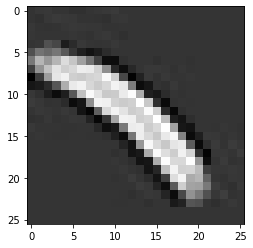

In [23]:
theta3 = 45*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

kernel_3 = cv2.getGaborKernel((3,3),sigma3,theta3,lamda3,gamma3,phi3)

rot_new_3=convolution(rot_90(image_3),kernel_3)
plt.imshow(rot_new_3,cmap = cm.gray)
plt.show()

theta3_2 = -45*np.pi/180
#로테이션 각도 ( 각도 표기 형식으로 설정 )

kernel_3_2 = cv2.getGaborKernel((3,3),sigma3,theta3_2,lamda3,gamma3,phi3)

rot_new_3_2=convolution(rot_90(image_3),kernel_3_2)
plt.imshow(rot_new_3_2,cmap = cm.gray)
plt.show()


컨볼루션 함수 수행 for image_baboon

<function matplotlib.pyplot.show(close=None, block=None)>

array([[ 0.92463201,  0.60280261,  0.08419298],
       [ 0.00344493,  0.54030231,  0.90078218],
       [-0.9269572 , -0.96748545, -0.69218558]])

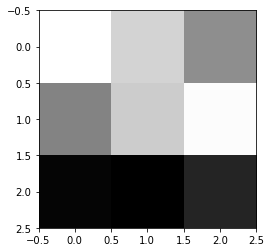

In [24]:
sigma = 8
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta = 5
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda = np.pi
#각도 형식으로 입력 ( 파장의 유형 )

gamma = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi = 1
# 위상 오프셋을 설정
kernel = cv2.getGaborKernel((3,3),sigma,theta,lamda,gamma,phi)
plt.imshow(kernel,cmap = cm.gray)
plt.show
kernel

흑백으로 출력

<function matplotlib.pyplot.show(close=None, block=None)>

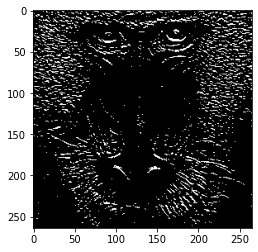

In [25]:
new_baboon = convolution(image_baboon, kernel)

ret, new_baboon_bin = cv2.threshold(new_baboon,127,255, cv2.THRESH_BINARY)
plt.imshow(new_baboon_bin,cmap = cm.gray)
plt.show

회전수행

array([[-0.3463786 ,  0.00210584,  0.34550974],
       [-0.591412  ,  0.54030231,  0.36848585],
       [-0.25865086,  0.5506371 ,  0.03146062]])

<function matplotlib.pyplot.show(close=None, block=None)>

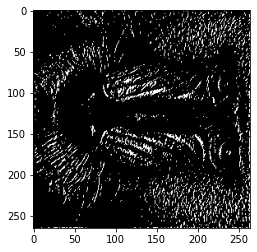

In [26]:
sigma = 1
#0이 아닌 값을 넣어야 계수가 나옴 ( 표준 편차를 나타냄, 표준편차가 0이면 모든 값이 동일,)

theta = (5/np.pi+0.5)*np.pi
#로테이션 각도 ( 각도 표기 형식으로 설정 )

lamda = np.pi
#각도 형식으로 입력 ( 파장의 유형 )

gamma = 1
# 1이 적당함 ( 가로와 세로의 비율을 나타냄, 감마가 1이면 필터의 모양이 원, 1이 아니면 타원 )

phi = 1
# 위상 오프셋을 설정
kernel = cv2.getGaborKernel((3,3),sigma,theta,lamda,gamma,phi)

kernel

new_baboon_rot = convolution(rot_90(image_baboon),kernel)

ret, new_baboon_rot_bin = cv2.threshold(new_baboon_rot,127,255, cv2.THRESH_BINARY)
plt.imshow(new_baboon_rot_bin,cmap = cm.gray)
plt.show

#201600282 엄기산